### Portugal Crimes Report by Type & Location

In [83]:
import urllib.request, json
import pandas as pd
import matplotlib.pyplot as plt

url = "https://www.ine.pt/ine/json_indicador/pindica.jsp?op=2&varcd=0008073&lang=PT"
response = urllib.request.urlopen(url)
data = json.loads(response.read().decode())

#print(json.dumps(data, indent=4))

In [84]:
for item in data:
    df = pd.json_normalize(item["Dados"]['2022'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5504 entries, 0 to 5503
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   geocod           5504 non-null   object
 1   geodsg           5504 non-null   object
 2   dim_3            5504 non-null   object
 3   dim_3_t          5504 non-null   object
 4   valor            4482 non-null   object
 5   sinal_conv       1022 non-null   object
 6   sinal_conv_desc  1022 non-null   object
dtypes: object(7)
memory usage: 301.1+ KB


In [ ]:
df.fillna(0, inplace=True)

df['valor'] = df['valor'].astype(int)

In [115]:
filter_geo = ['Portugal','Continente','Norte','Centro']
filter_type = ['Total']

df_filtered = df[~df['dim_3_t'].isin(filter_type)]
df_filtered = df_filtered[~df['geodsg'].isin(filter_geo)]


/var/folders/74/ctw0cxv57bv_0qt4034v71_c0000gn/T/ipykernel_1390/3685666916.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[~df['geodsg'].isin(filter_geo)]


In [107]:
df_filtered.head()

,geocod,geodsg,dim_3,dim_3_t,valor,sinal_conv,sinal_conv_desc
0,16D0114,Oliveira do Bairro,28211_2840,Roubo por esticão e na via pública,3,0,0
1,16D0117,Sever do Vouga,28211_2840,Roubo por esticão e na via pública,4,0,0
2,16D0118,Vagos,28211_2840,Roubo por esticão e na via pública,3,0,0
3,16E0605,Figueira da Foz,28211_2840,Roubo por esticão e na via pública,19,0,0
4,16E0111,Mealhada,28211_2840,Roubo por esticão e na via pública,0,…,Dado confidencial


In [108]:
df_filtered['dim_3_t'].value_counts()

Roubo por esticão e na via pública                                    337
Crimes contra o Estado                                                337
Crimes de homicídio voluntário consumado                              337
Crimes contra animais de companhia                                    337
Crimes contra a integridade física                                    337
Furto de veículo e em veículo motorizado                              337
Violência doméstica contra cônjuge ou análogos                        337
Condução sem habilitação legal                                        337
Crimes contra a vida em sociedade                                     337
Ofensa à integridade física voluntária simples                        337
Crimes contra a identidade cultural e integridade pessoal             337
Condução de veículo com taxa de álcool igual ou superior a 1,2 g/l    337
Crimes contra as pessoas                                              337
Crimes contra o património            

In [109]:
df_group_crime = df_filtered.groupby(['dim_3_t'])['valor'].sum().reset_index()

df_group_crime = df_group_crime.sort_values(by='valor', ascending=False)

<Axes: xlabel='dim_3_t'>

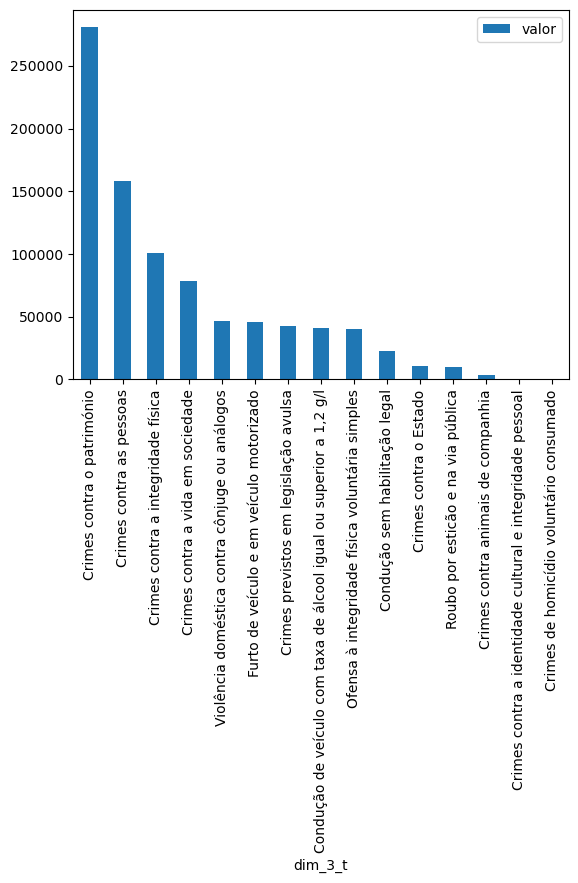

In [110]:
df_group_crime.plot(kind='bar',x='dim_3_t',y='valor')

In [114]:
df_group_geo = df_filtered.groupby(['geodsg'])['valor'].sum().reset_index()
df_group_geo.sort_values(by=['valor'], ascending=False, inplace=True)
df_group_geo.head(50)

,geodsg,valor
15,Algarve,68708
133,Lisboa,47059
229,Região Autónoma dos Açores,45501
11,Alentejo,37583
228,Região Autónoma da Madeira,34419
219,Porto,20856
263,Sintra,17379
230,Região de Aveiro,17118
231,Região de Coimbra,16711
185,Oeste,15887


Text(0, 0.5, 'Valor')

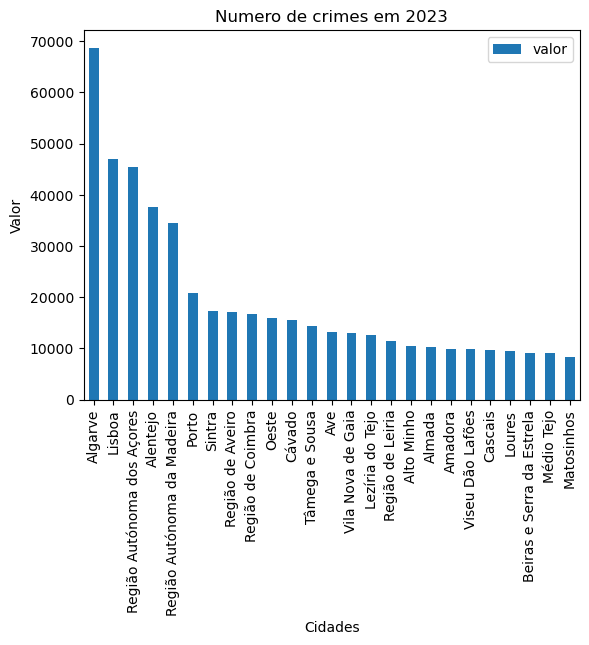

In [112]:
df_group_geo.head(25).plot(kind='bar',x='geodsg',y='valor')
plt.title('Numero de crimes em 2023')
plt.xlabel('Cidades')
plt.ylabel('Valor')